In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

# SELECT max(date) AS "Most Recent Date" FROM measurement LIMIT 1

('2017-08-23')

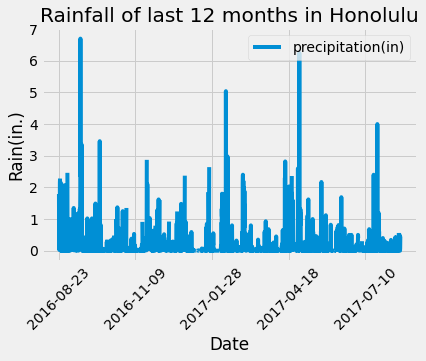

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
earliest_date = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

# Perform a query to retrieve the date and precipitation scores
rain_dates = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=earliest_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(rain_dates, columns=['date', 'precipitation(in)'])

# Sort the dataframe by date
rain_df = rain_df.sort_values('date')



# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot(x='date', y='precipitation(in)', rot=45)
plt.ylabel('Rain(in.)')
plt.xlabel('Date')
plt.title("Rainfall of last 12 months in Honolulu")
plt.legend(loc='upper right')
plt.show()



In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_df.describe()


,precipitation(in)
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(func.count(Station.station)).all()
station_count

[(9)]

In [29]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()

#SELECT station, count(station) FROM station Group by Station Order by count(station) desc
# List the stations and the counts in descending order.
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                        filter(Measurement.station=='USC00519281').all()
# SELECT min(tobs), max(tobs), avg(tobs) FROM measurement WHERE station = "USC00519281"
temp_data

[(54.0, 85.0, 71.66378066378067)]

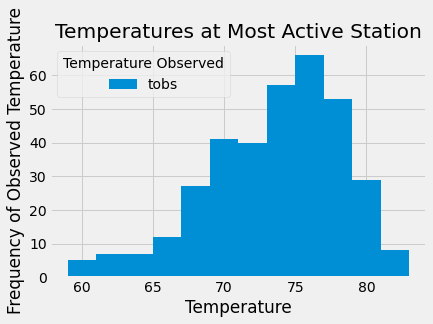

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
recent_temp = session.query(Measurement.tobs).filter(Measurement.date>=earliest_date).filter(Measurement.station=='USC00519281').all()
#SELECT tobs FROM Measurement WHERE date>=earliest_date AND station='USC'
temp_df = pd.DataFrame(recent_temp, columns=['tobs'])
temp_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency of Observed Temperature')
plt.title("Temperatures at Most Active Station")
plt.legend(title="Temperature Observed")
plt.show()
            

# Close session

In [17]:
# Close Session
session.close()